## Importing Libraries

In [1]:
import numpy as np
import pandas as pd                     # reading csv file
import matplotlib.pyplot as plt 
import seaborn as sns                   #for plotting

from sklearn.ensemble import RandomForestClassifier             #for the model
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report          #for model evaluation
from sklearn.metrics import confusion_matrix             #for model evaluation
from sklearn.model_selection import train_test_split     #for data splitting


## Reading the Data from the file

In [2]:
data = pd.read_csv('heart.csv')

### Reading the first 10 rows of the file

In [3]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Reading 10 random samples from the file

In [4]:
data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0


### Reading the columns of the table

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Total number of rows in the csv file

In [6]:
data.shape    # 303 records

(303, 14)

In [7]:
# checking if the data set is balanced
numberOfPosPatients = data.loc[data.target == 1].count()
numberOfNegPatients = data.loc[data.target == 0].count()
print("Positive count " + str(numberOfPosPatients))
print("Negative count " + str(numberOfNegPatients))

Positive count age         165
sex         165
cp          165
trestbps    165
chol        165
fbs         165
restecg     165
thalach     165
exang       165
oldpeak     165
slope       165
ca          165
thal        165
target      165
dtype: int64
Negative count age         138
sex         138
cp          138
trestbps    138
chol        138
fbs         138
restecg     138
thalach     138
exang       138
oldpeak     138
slope       138
ca          138
thal        138
target      138
dtype: int64


### **Plotting a bar graph against the number**


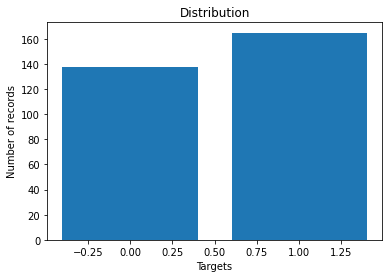

In [8]:
x = [0,1]
y = [138, 165]

plt.title("Distribution")
plt.ylabel("Number of records")
plt.xlabel("Targets")
plt.bar(x,y)
plt.show()

### **Creating the dependent and independent variables with their labels**

In [90]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', 1), data['target'], test_size = .2, random_state=10) #split the data

In [91]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape     # 303 rows

((242, 13), (242,), (61, 13), (61,))

### Implementing Oversampling for handling Imbalanced data

In [103]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=69)
X_train, y_train = smk.fit_sample(X_train, y_train)
X_test, y_test = smk.fit_sample(X_test, y_test)

In [104]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape         # 308

((266, 13), (266,), (66, 13), (66,))

### The meaning of the columns are as follows
- **age**:  The person's age in years
- **sex**:  The person's sex (1 = male, 0 = female)
- **cp**:  The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps**:  The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol**:  The person's cholesterol measurement in mg/dl
- **fbs**:  The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- **restecg**:  Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach**:  The person's maximum heart rate achieved
- **exang**:  Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**:  ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
- **slope**:  the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca**:  The number of major vessels (0-3)
- **thal**:  A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target**:  Heart disease (0 = no, 1 = yes)


**Diagnosis**: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on , ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests .

Looking at information of heart disease risk factors led me to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking . According to another source , the major factors that can't be changed are: increasing age, male gender and heredity. Note that thalassemia, one of the variables in this dataset, is heredity. Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes. Other factors include stress, alcohol and poor diet/nutrition.

I can see no reference to the 'number of major vessels', but given that the definition of heart disease is "...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries", it seems logical the more major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, I would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.
 

### Changing the column names to a more clearer name

In [13]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achived',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [14]:
data.columns  # columns are now changed to a meaningful set of columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achived', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [15]:
data.sample(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achived,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0


In [16]:
data.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achived       int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

## Exploratory Data Analysis

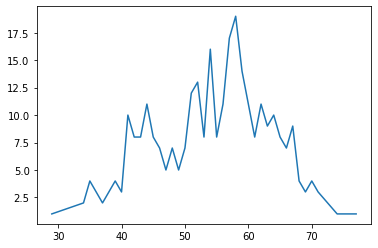

<Figure size 1080x288 with 0 Axes>

In [17]:
plt.plot(data['age'].value_counts().sort_index())
plt.figure(figsize=(15,4))
plt.show()

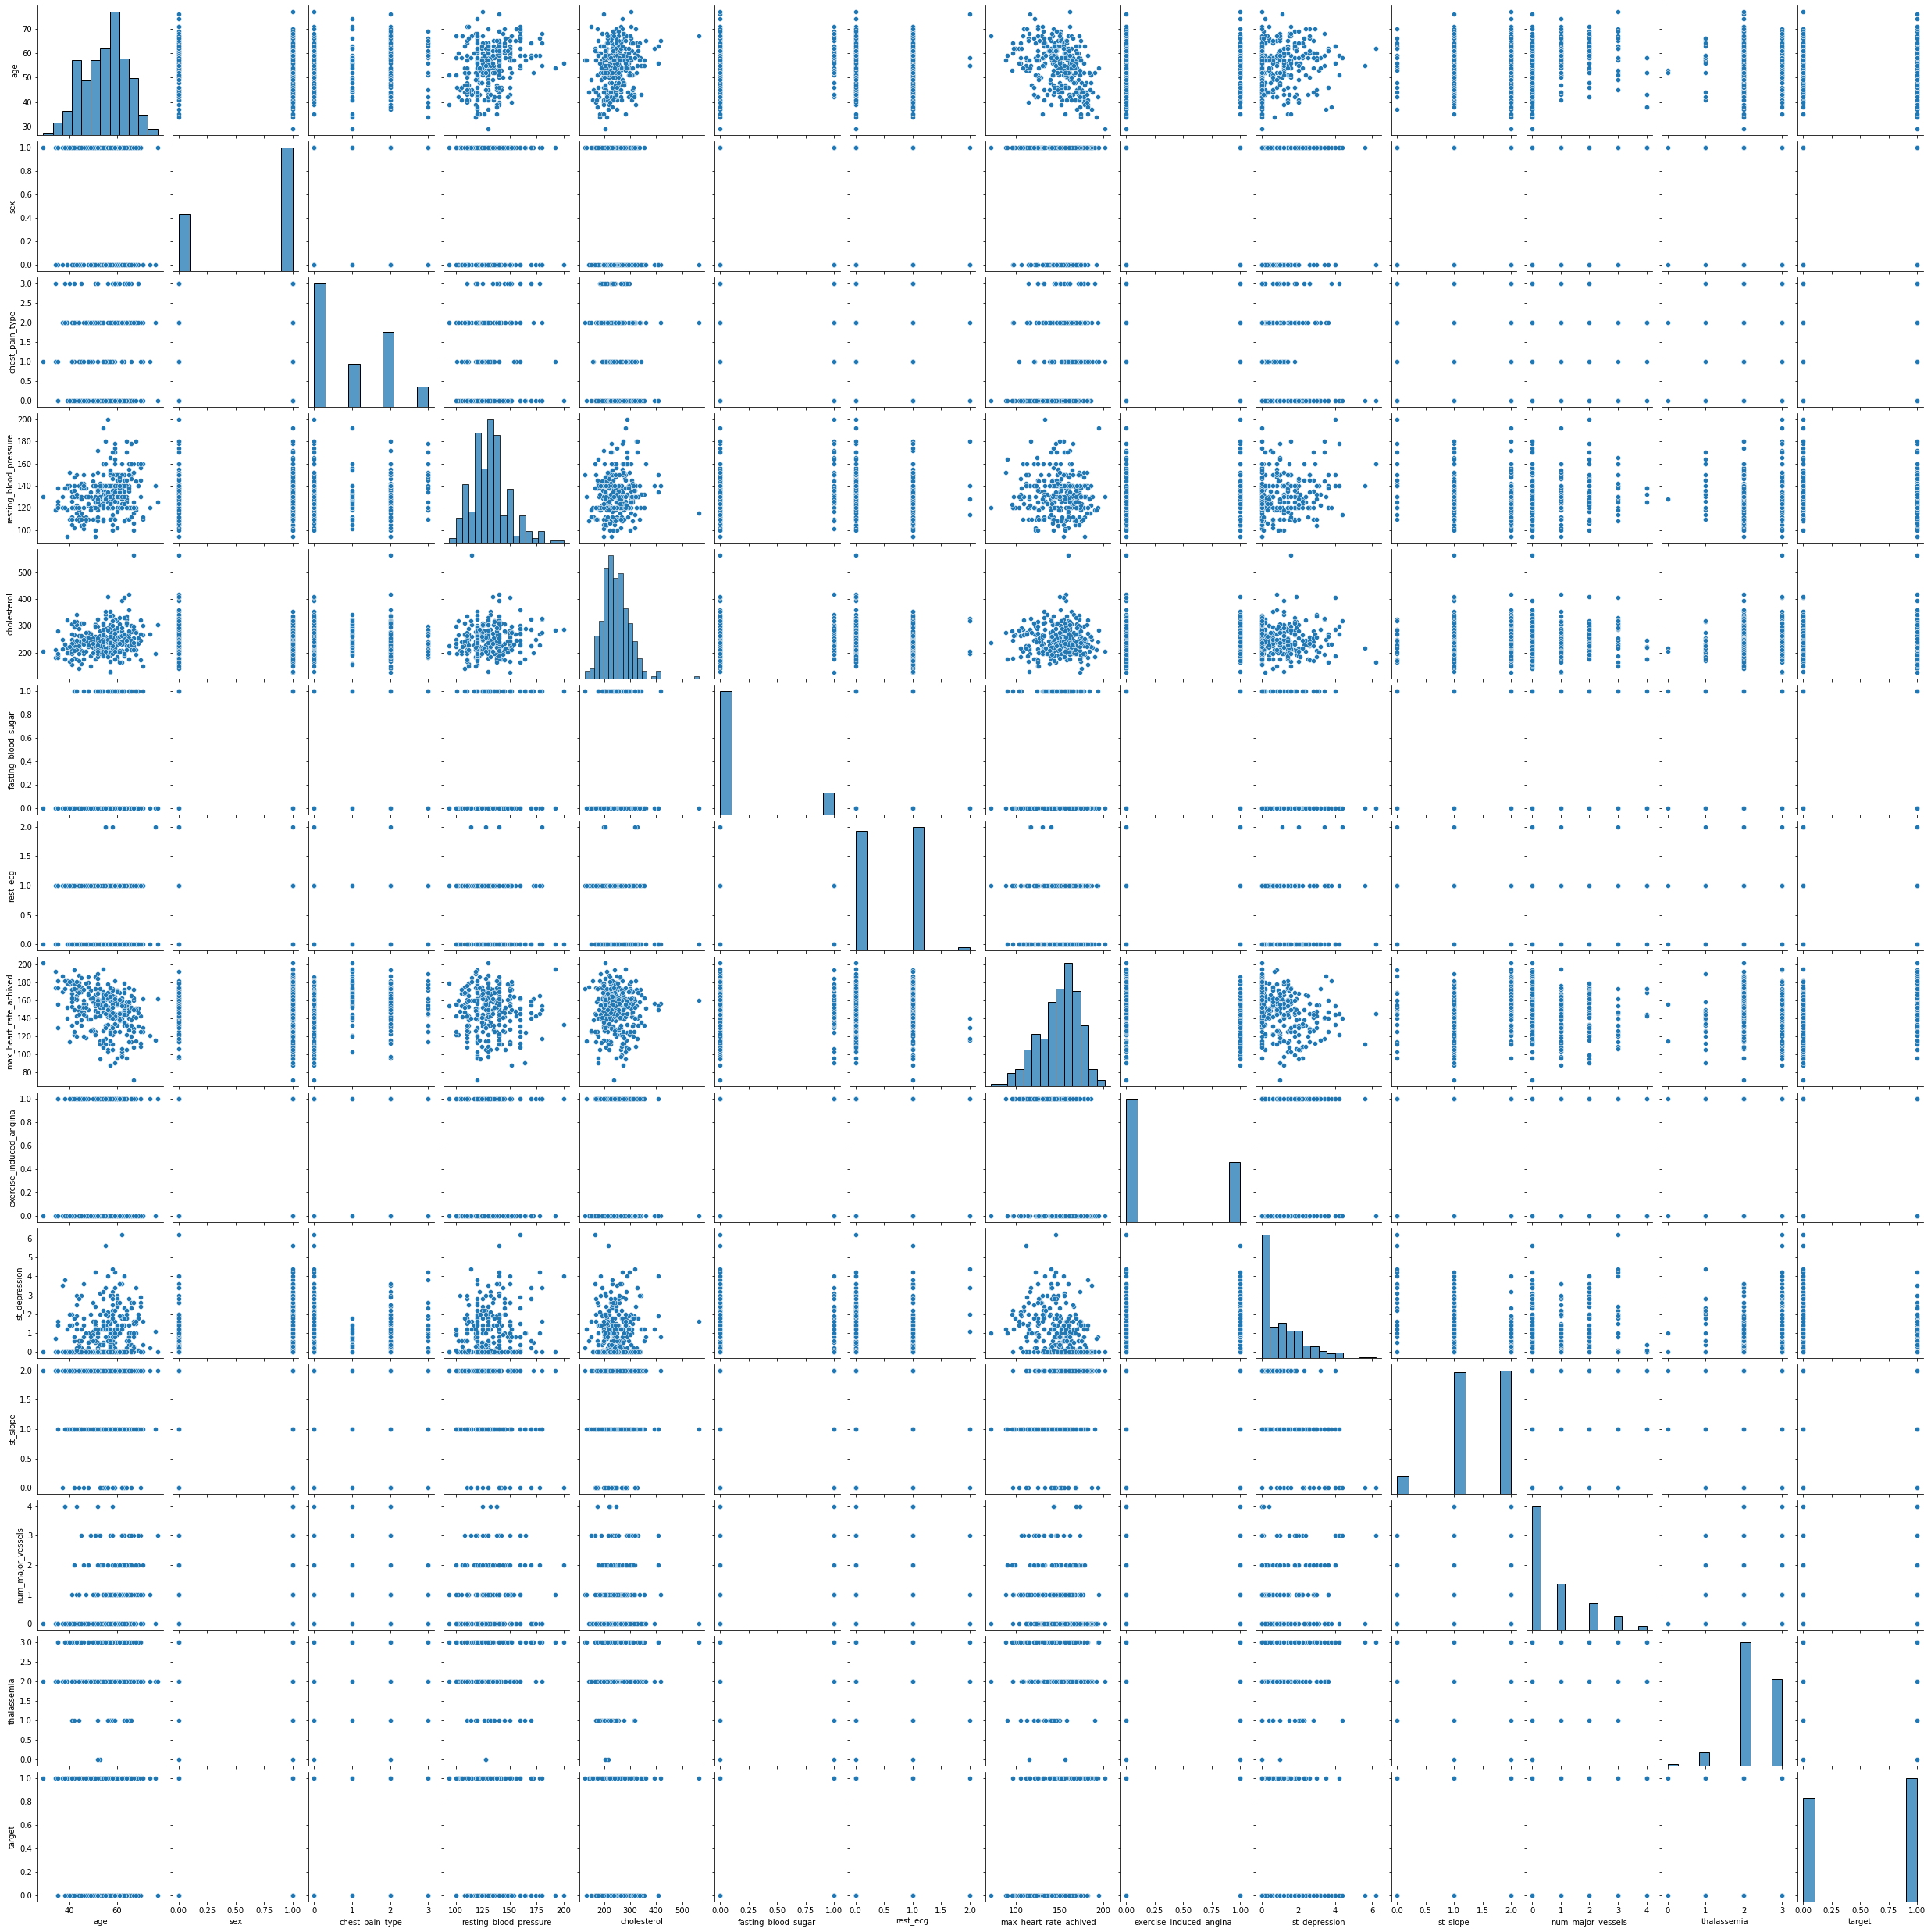

In [18]:
sns.pairplot(data)

### Checking for null values


In [19]:
data.isnull().values.any()

False

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split 

### Predicting using Random forest model

In [126]:
#
# Results (Accuracy score: 87.8%, Sensitivity: 93.9%, Specifictity: 81.8% )
#
modelRF = RandomForestClassifier(max_depth=5)
modelRF.fit(X_train, y_train)

y_predictRF = modelRF.predict(X_test)
print(y_predictRF)

# creating a confusion matrix 
cm = confusion_matrix(y_test, y_predictRF) 
ac = accuracy_score(y_test, y_predictRF)
rs = recall_score(y_test, y_predictRF, average=None)
ps = precision_score(y_test, y_predictRF, average=None)

print("Confusion matrix: " + str(cm))
print("Accuracy score: " + str(ac*100)+"%")
print("Recall score: " + str(rs))
print("Precision score: " + str(ps))

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {}% | Specifictity: {}%".format(sensitivity*100, specificity*100)

[0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0
 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
Confusion matrix: [[27  6]
 [ 2 31]]
Accuracy score: 87.87878787878788%
Recall score: [0.81818182 0.93939394]
Precision score: [0.93103448 0.83783784]


'Sensitivity: 93.93939393939394% | Specifictity: 81.81818181818183%'

### **Predicting using the Descision Tree Classifier**

In [129]:
#
# Results (Accuracy score: 73.3%, Sensitivity: 73.3%, Specifictity: 73.3% )
#
from sklearn.tree import DecisionTreeClassifier 

dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 
ac = accuracy_score(y_test, dtree_predictions)
rs = recall_score(y_test, dtree_predictions, average=None)
ps = precision_score(y_test, dtree_predictions, average=None)

print("Confusion matrix: " + str(cm))
print("Accuracy score: " + str(ac*100))
print("Recall score: " + str(rs))
print("Precision score: " + str(ps))

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {}% | Specifictity: {}%".format(sensitivity*100, specificity*100)

Confusion matrix: [[15 18]
 [ 1 32]]
Accuracy score: 71.21212121212122
Recall score: [0.45454545 0.96969697]
Precision score: [0.9375 0.64  ]


'Sensitivity: 96.96969696969697% | Specifictity: 45.45454545454545%'

### **Predicting using Support Vector Machine Classification**

In [130]:
#
# Results (Accuracy score: 78.3%, Sensitivity: 76.6%, Specifictity: 80.0% )
#
from sklearn.svm import SVC 

## training a SVM classifier 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 

## Prediction using SVM
svm_predictions = svm_model_linear.predict(X_test) 
print(svm_predictions)
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix, calculating accuracy, calculating score, calculating precision
cm = confusion_matrix(y_test, svm_predictions) 
ac = accuracy_score(y_test, svm_predictions)
rs = recall_score(y_test, svm_predictions, average=None)
ps = precision_score(y_test, svm_predictions, average=None)

print("Confusion matrix: " + str(cm))
print("Accuracy score: " + str(ac*100))
print("Recall score: " + str(rs))
print("Precision score: " + str(ps))

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {}% | Specifictity: {}%".format(sensitivity*100, specificity*100)

[0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
Confusion matrix: [[28  5]
 [ 5 28]]
Accuracy score: 84.84848484848484
Recall score: [0.84848485 0.84848485]
Precision score: [0.84848485 0.84848485]


'Sensitivity: 84.84848484848484% | Specifictity: 84.84848484848484%'

### **Predicting using KNN Classifier**

Text(0, 0.5, 'Error Rate')

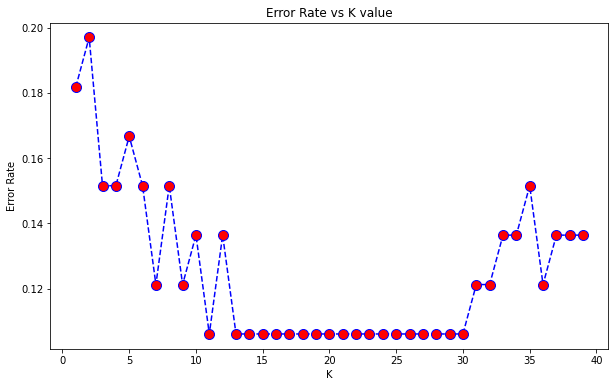

In [131]:
# Choosing the best K value for KNN
from sklearn.neighbors import KNeighborsClassifier 
error_rate = []

for i in range(1,40):  #checking from 1 to 40 for the K value
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) # when the 'pred' value doesn't match with the 'y value' I get the mean of that
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red' ,markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [134]:
#
# Results (Accuracy score: 89.4%, Sensitivity:  93.9%, Specifictity: 84.8% )
#
from sklearn.neighbors import KNeighborsClassifier 

## training a KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 14).fit(X_train, y_train) 

## Prediction using KNN
knn_predictions = knn.predict(X_test)  
print(knn.predict(X_test))

## Accuracy on X_test 
accuracy = knn.score(X_test, y_test) 

## Creating a confusion matrix 
cm = confusion_matrix(y_test, knn_predictions) 
ac = accuracy_score(y_test, knn_predictions)
rs = recall_score(y_test, knn_predictions, average=None)
ps = precision_score(y_test, knn_predictions, average=None)

## Displaying the content
print("Confusion matrix: " + str(cm))
print("Accuracy score: " + str(ac*100))
print("Recall score: " + str(rs))
print("Precision score: " + str(ps))

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {}% | Specifictity: {}%".format(sensitivity*100, specificity*100)

[0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0
 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]
Confusion matrix: [[28  5]
 [ 2 31]]
Accuracy score: 89.39393939393939
Recall score: [0.84848485 0.93939394]
Precision score: [0.93333333 0.86111111]


'Sensitivity: 93.93939393939394% | Specifictity: 84.84848484848484%'

In [133]:
# saving the knn  model becuase it gave the best result
import joblib
joblib.dump(knn, 'heart-diagnosing-model-knn')

['heart-diagnosing-model-knn']

### **Predicting using Navie Bayes Classifier**

In [135]:
#
# Results (Accuracy score: 81.6%, Sensitivity: 83.3%, Specifictity: 80.0% )
#
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 
ac = accuracy_score(y_test, gnb_predictions)
rs = recall_score(y_test, gnb_predictions, average=None)
ps = precision_score(y_test, gnb_predictions, average=None)

print("Confusion matrix: " + str(cm))
print("Accuracy score: " + str(ac*100))
print("Recall score: " + str(rs))
print("Precision score: " + str(ps))

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {}% | Specifictity: {}%".format(sensitivity*100, specificity*100)

Confusion matrix: [[27  6]
 [ 4 29]]
Accuracy score: 84.84848484848484
Recall score: [0.81818182 0.87878788]
Precision score: [0.87096774 0.82857143]


'Sensitivity: 87.87878787878788% | Specifictity: 81.81818181818183%'

### **Predicting using Logistic Regression Classifier**

In [136]:
#
# Results (Accuracy score: 81.6%, Sensitivity:83.3%, Specifictity: 80.0% )
#
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

LogRegClassi = LogisticRegression(random_state=101)

LogRegClassi.fit(X_train, y_train)

y_predLg = LogRegClassi.predict(X_test)

## Accuracy on X_test 
accuracy = LogRegClassi.score(X_test, y_test) 

## Creating a confusion matrix 
cm = confusion_matrix(y_test, y_predLg) 
ac = accuracy_score(y_test, y_predLg)
rs = recall_score(y_test, y_predLg, average=None)
ps = precision_score(y_test, y_predLg, average=None)

## Displaying the content
print("Confusion matrix: " + str(cm))
print("Accuracy score: " + str(ac*100))
print("Recall score: " + str(rs))
print("Precision score: " + str(ps))

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {}% | Specifictity: {}%".format(sensitivity*100, specificity*100)


Confusion matrix: [[27  6]
 [ 4 29]]
Accuracy score: 84.84848484848484
Recall score: [0.81818182 0.87878788]
Precision score: [0.87096774 0.82857143]


'Sensitivity: 87.87878787878788% | Specifictity: 81.81818181818183%'

## Testing with saved model  (using knn algo)

In [159]:
# loadedModel = joblib.load('heart-diagnosing-model')
# X_test_New = [[61,1,0,140,207,0,0,138,1,1.9,2,1,3]]
# loadedModel.predict(X_test_New)[0]

0